<a href="https://colab.research.google.com/github/aryabir2k01/MinorProject/blob/main/E_Signing_of_Loan_Based_on_Financial_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>E-Signing of Loan Based on Financial History</h1></center>

<h4>ESignature:</h4>
<br>
<p style="text-indent:5em">Electronic signatures aren’t exactly a novelty. They have been around since the American Civil War, during which contracts were signed through Morse. In a modern setting, an e-Sign refers to a unique, digitised, encrypted personal identifier. This is, in essence, different from the ‘wet’ signatures created by hand. The e-Sign is meant to complete transactions, loops, and agreements electronically.</p>

<p style="text-indent:5em">In India, the e-Sign has been granted legal status by amendments to various laws, namely the Information Technology Act, Indian Evidence Act and the Negotiable Instruments Act. Early adopters in the financial sector have started using e-Sign to get customers to sign loan and card applications, and loan agreements.</p>



### Importing the Library

In [ ]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the library for evaluating the model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Reading the Data

In [ ]:
df=pd.read_csv("financial_data.csv")
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [ ]:
df

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


### Exploring the Data

In [ ]:
#Finding the count of each class of dependent variable
print(sum(df["e_signed"]==1))
print(sum(df["e_signed"]==0))

9639
8269


In [ ]:
#Checking for percentage of missing data in each column
percent_missing = df.isnull().sum() * 100 / len(df)                
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})          

missing_value_df

,percent_missing
entry_id,0.0
age,0.0
pay_schedule,0.0
home_owner,0.0
income,0.0
months_employed,0.0
years_employed,0.0
current_address_year,0.0
personal_account_m,0.0
personal_account_y,0.0


<p style="text-indent:5em">We see that the data is not highly imbalanced since the ratio between the count of two classes of dependent variable is not so high.

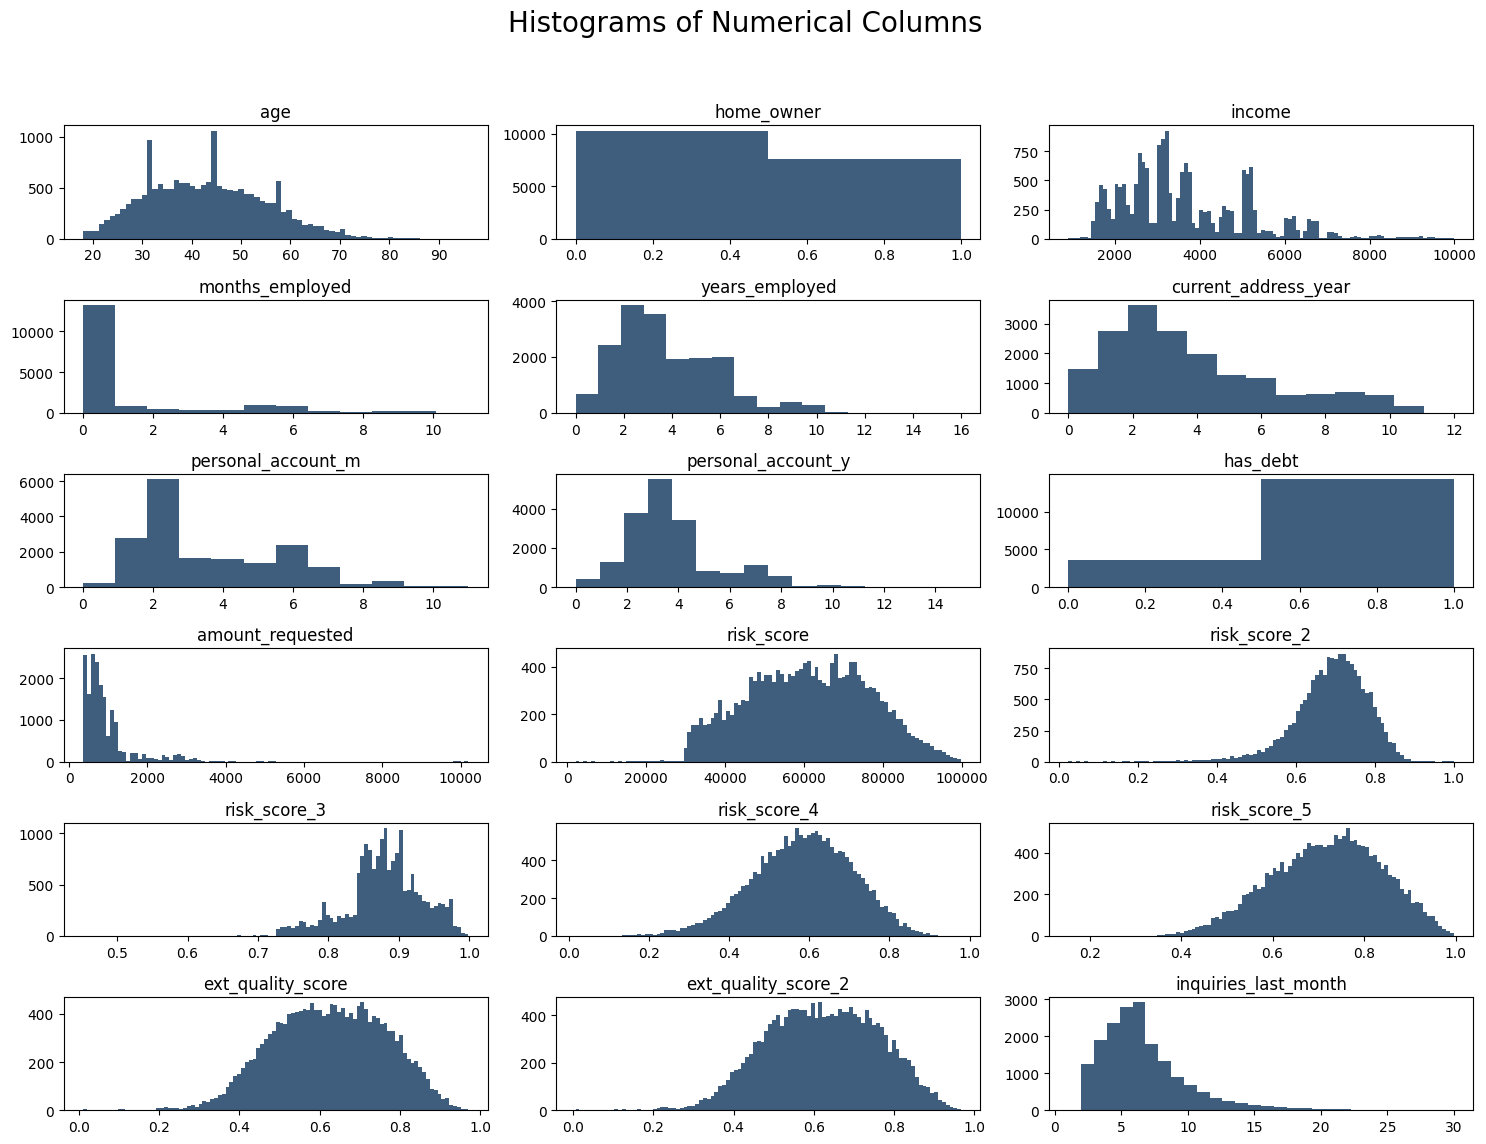

In [ ]:
#Dropping the unnecessary columns
dataset2 = df.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))

plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<Axes: title={'center': 'correlation wigh E signed'}>

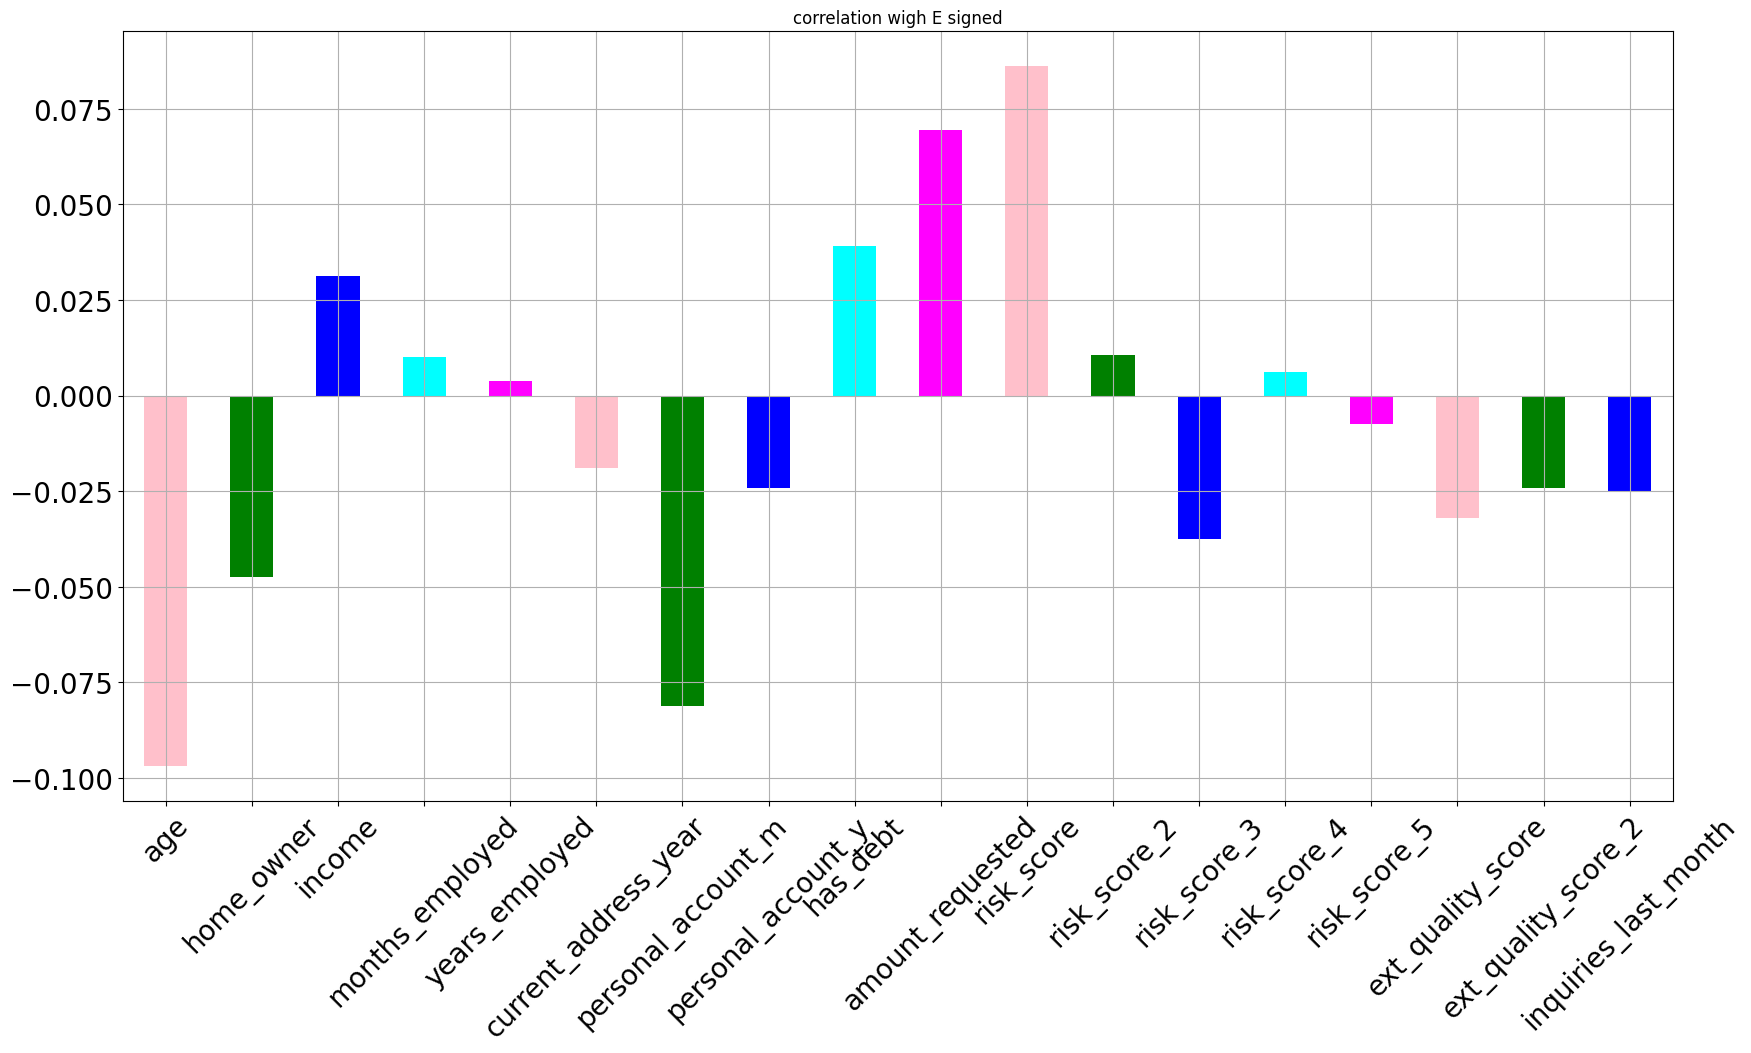

In [ ]:
#Correlation of independent variable with dependent variable

dataset2.corrwith(df.e_signed).plot.bar(figsize=(20,10),title="correlation wigh E signed",
                                             fontsize=20,rot=45,grid= True,color=['pink','green',
                                                                                  'blue','cyan','magenta'])

In [ ]:
#Initiatizig into new variable and creating the dummy variable for categorical data
data=df
dummy=pd.get_dummies(data["pay_schedule"])


In [ ]:
dummy

,bi-weekly,monthly,semi-monthly,weekly
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
17903,0,1,0,0
17904,1,0,0,0
17905,0,0,0,1
17906,1,0,0,0


In [ ]:
dummy=dummy.drop(labels=["bi-weekly"],axis=1)

In [ ]:

data=data.drop(["pay_schedule"],axis=1)

In [ ]:

data=pd.concat([data,dummy],axis=1)

In [ ]:

data.shape

(17908, 23)

In [ ]:
# Seperating the data into dependent and independent varioable. Response contains the esigned column which needs to be computed
#from the dataset
response = data["e_signed"]
dataset = data.drop(columns = ["e_signed", "entry_id"])

In [ ]:
#Transforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()

In [ ]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [ ]:
#Fitting and transforming our data
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
#for Logistic Regression
x_train=X_train
x_test=X_test

In [ ]:
x_train.shape

(14326, 21)

#Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
results=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1]],columns=['Model','Accuracy score','Precision score','Recall score','F1 score'])
results

,Model,Accuracy score,Precision score,Recall score,F1 score
0,Logistic Regression,0.569235,0.582653,0.703838,0.637538


#### Building ANN Using Keras


In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()

In [ ]:
#Adding the layers in ANN
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))


classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1433/1433 [==============================] - 3s 1ms/step - loss: 0.6747 - accuracy: 0.5750
Epoch 2/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6644 - accuracy: 0.5883
Epoch 3/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6619 - accuracy: 0.5949
Epoch 4/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6590 - accuracy: 0.6014
Epoch 5/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6554 - accuracy: 0.6091
Epoch 6/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6515 - accuracy: 0.6139
Epoch 7/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6473 - accuracy: 0.6190
Epoch 8/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6445 - accuracy: 0.6207
Epoch 9/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6427 - accuracy: 0.6235
Epoch 10/100
1433/1433 [==============================] - 2s 1ms/step - l

In [ ]:
#Predict functioon the test data using the model
pred=classifier.predict(X_test)

112/112 [==============================] - 0s 1ms/step


In [ ]:

y_pred = (pred > 0.5)

In [ ]:
accuracy_score(y_pred,y_test)

0.6141820212171971

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
results=pd.DataFrame([['Artificial Neural Network',acc,prec,rec,f1]],columns=['Model','Accuracy score','Precision score','Recall score','F1 score'])
results

,Model,Accuracy score,Precision score,Recall score,F1 score
0,Artificial Neural Network,0.614182,0.627451,0.697095,0.660442


## Other Machine Learning Model

#### Feature Engineering

##### AGE



In [ ]:
#Initializing the Empty List
AGE=[]

for i in range(len(df)):
    if(df["age"][i]<=45):
        AGE.append("ADULT")
        
    else:
        AGE.append("SENIOR")

#### Months Employed and Personal Account

We will calculate months employed as follows:
<br>
<p style="text-indent:5em">month employed=month employed+ years employed*12</p>
    <p style="text-indent:5em">account_m=account_m+account_y*12</p>


In [ ]:
EMPLOYED=[]
for i in range(len(df)):
    x=df["months_employed"][i]+df["years_employed"][i]*12
    EMPLOYED.append(x)

In [ ]:
PA=[]
for i in range(len(df)):
    x=df["personal_account_m"][i]+df["personal_account_y"][i]*12
    PA.append(x)

In [ ]:
avg_risk=[]
for i in range(len(df)):
    x=(df["risk_score_2"][i]+df["risk_score_3"][i]+df["risk_score_4"][i]+df["risk_score_5"][i])/4
    avg_risk.append(x)

In [ ]:
ext_quality=[]
for i in range(len(df)):
    x=(df["ext_quality_score_2"][i]+df["ext_quality_score"][i])/2
    ext_quality.append(x)

#### Merging all the features into Single Dataframe

<p style="text-indent:5em">


In [ ]:
#Converting all lists into DataFrame
AGE=pd.DataFrame(AGE)
EMPLOYED=pd.DataFrame(EMPLOYED)
PA=pd.DataFrame(PA)
avg_risk=pd.DataFrame(avg_risk)
ext_quality=pd.DataFrame(ext_quality)

#Concatng all the features
featured=pd.concat([AGE,EMPLOYED,PA,avg_risk,ext_quality],axis=1)

In [ ]:
featured.columns=["AGE","EMPLOYED","PA","RISK","QUALITY"]

In [ ]:
featured.head()

,AGE,EMPLOYED,PA,RISK,QUALITY
0,ADULT,36,30,0.661151,0.480918
1,SENIOR,72,86,0.789841,0.680720
2,ADULT,6,19,0.691712,0.531712
3,ADULT,72,86,0.793179,0.692552
4,ADULT,60,98,0.688483,0.744634


In [ ]:
#Creating Dummy Variable
dummy1=pd.get_dummies(featured["AGE"])
dummy1.head()

,ADULT,SENIOR
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [ ]:
#Dropping the AGE Variable since dummy variable is created
featured=featured.drop(["AGE"],axis=1)

#Concating the data and dummy variable
featured=pd.concat([featured,dummy1],axis=1)
featured.head()

,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,36,30,0.661151,0.480918,1,0
1,72,86,0.789841,0.680720,0,1
2,6,19,0.691712,0.531712,1,0
3,72,86,0.793179,0.692552,1,0
4,60,98,0.688483,0.744634,1,0


#### Classifying the Data into dependent and independent Variable

In [ ]:
#Dependent Variable
dep="e_signed"

#Selelcting all the column as independent variable
ind=df.columns.tolist()

In [ ]:
ind

['entry_id',
 'age',
 'pay_schedule',
 'home_owner',
 'income',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month',
 'e_signed']

In [ ]:
#Removing the dependent variable from independent
ind.remove(dep)
ind.remove("entry_id")

In [ ]:
#Selecting the Data
X=df[ind]
Y=df[dep]

In [ ]:
#Concating the featured data and unfeatured data
X=pd.concat([X,featured],axis=1)
X.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,40,bi-weekly,1,3135,0,3,3,6,2,1,...,0.515977,0.580918,0.380918,10,36,30,0.661151,0.480918,1,0
1,61,weekly,0,3180,0,6,3,2,7,1,...,0.826402,0.730720,0.630720,9,72,86,0.789841,0.680720,0,1
2,23,weekly,0,1540,6,0,0,7,1,1,...,0.762284,0.531712,0.531712,7,6,19,0.691712,0.531712,1,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,...,0.778831,0.792552,0.592552,8,72,86,0.793179,0.692552,1,0
4,33,semi-monthly,0,3590,0,5,2,2,8,1,...,0.665523,0.744634,0.744634,12,60,98,0.688483,0.744634,1,0


In [ ]:
#Dropping the unnecessay data from our dataset
X=X.drop(labels=["age","months_employed","years_employed","personal_account_m","personal_account_y","risk_score_2","risk_score_3"
                ,"risk_score_4","risk_score_5","ext_quality_score_2","ext_quality_score"],axis=1)

In [ ]:
X.head()

,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,bi-weekly,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0
1,weekly,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1
2,weekly,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0
3,bi-weekly,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0
4,semi-monthly,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0


In [ ]:
#Creating Dummy Variable
dummy2=pd.get_dummies(X["pay_schedule"])

#Removing the trap
dummy2=dummy2.drop(labels=["bi-weekly"],axis=1)
dummy2.head()

,monthly,semi-monthly,weekly
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [ ]:
#Dropping the pay_schedule since dummy variable is created
X=X.drop(labels=["pay_schedule"],axis=1)

#Concating the data and dummy variable
X=pd.concat([X,dummy2],axis=1)
X.head()

,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR,monthly,semi-monthly,weekly
0,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0,0,0,0
1,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1,0,0,1
2,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0,0,0,1
3,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0,0,0,0
4,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0,0,1,0


#### Data Transformation and Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()
#Transforming the data
X=scale.fit_transform(X)

##### Splitting the Data

In [ ]:
#from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
#Initializing the object
model=RandomForestClassifier()

<div>
    <br>
<img src="img/random.png" width="600"/>
</div>

In [ ]:
#Fitting the model
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
#Predictions on test data
pred=model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred)

0.6198347107438017

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(ytest,pred)
prec=precision_score(ytest,pred)
rec=recall_score(ytest,pred)
f1=f1_score(ytest,pred)


In [ ]:
model_results=pd.DataFrame([['Random Forest',acc,prec,rec,f1]],columns=['Model','Accuracy score','Precision score','Recall score','F1 score'])
model_results

,Model,Accuracy score,Precision score,Recall score,F1 score
0,Random Forest,0.619835,0.637189,0.673342,0.654767


### Gradient Boosting

In [ ]:
#Building the model 
clf_gbc = GradientBoostingClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_gbc.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_gbc.predict(X_test)                  #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
# cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
gbc_results = pd.DataFrame([['Gradient Boosting Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
gbc_results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Gradient Boosting Classifier,0.634283,0.67955,0.720436,0.643056


### XgBoost


In [ ]:
#Implementing xgboost
from xgboost import XGBClassifier

In [ ]:
#Initializing the model
xgb_clf = XGBClassifier()
xgb_clf.fit(xtrain, ytrain)
pred=model.predict(xtest)

In [ ]:
score = xgb_clf.score(xtest, ytest)
print(score)

0.6359169086441814


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(ytest,pred)
prec=precision_score(ytest,pred)
rec=recall_score(ytest,pred)
f1=f1_score(ytest,pred)

In [ ]:
model_results=pd.DataFrame([['XgBoost',score,prec,rec,f1]],columns=['Model','Accuracy score','Precision score','Recall score','F1 score'])
model_results

,Model,Accuracy score,Precision score,Recall score,F1 score
0,XgBoost,0.635917,0.637189,0.673342,0.654767


#### Support Vector Machine



In [ ]:
#Building the model 
clf_svc = SVC(random_state=0)#Creating the Random Forest Classifier Model
clf_svc.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_svc.predict(X_test)                  #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
# cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
svm_results = pd.DataFrame([['Support Vector Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
svm_results


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Support Vector Classifier,0.600223,0.651412,0.693983,0.613761


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc_model = knc.fit(X_train,y_train)
ts_pred_knc = knc_model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
ts_acc_knc = round(accuracy_score(y_test,ts_pred_knc),4)
print("Testing Accuracy is:-",round(ts_acc_knc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(y_test,ts_pred_knc),"\n")
print("===================================================")
# print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(knc_model,xtest,ytest))

Testing Accuracy is:- 56.53 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       0.53      0.50      0.52      1654
           1       0.59      0.62      0.61      1928

    accuracy                           0.57      3582
   macro avg       0.56      0.56      0.56      3582
weighted avg       0.56      0.57      0.56      3582
 



In [ ]:
#decision tree classifier
#Building the model 
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_dt.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_dt.predict(X_test)                  #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
# cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
dt_results = pd.DataFrame([['Decision Tree Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
dt_results


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Decision Tree Classifier,0.572864,0.605263,0.608402,0.602156



<br>
<h4>Models implemented:</h4>

<ul>
    <li>Logistic Regression</li>
    <li>Artificial Neural Network</li>
    <li>Random Forest Classifier</li>
    <li>Gradient Boosting</li>
    <li>Support Vector Machine</li>
    <li>Xg Boost</li>
    <li>KNN</li>
    <li>Decision Tree Classifier</li>
</ul>

<center><h2><u>Conclusion</u><h2></center
    
 <ul>
    <li>XgBoost Algorithm performs the best and give the accuracy of 63 %</li>
    <li>We see that the ANN with no feature engineering performs far better than SVM, Random Forest with feature engineering</li>
    <li>Though we didnt get very high accuracy but this can help the banks in knowing whether the customer is risky or not.</li>
</ul>